In [1]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
from dtreeviz.trees import dtreeviz
import numpy as np
import pandas as pd

In [2]:
# production of synthetic data:
# x = input variables
# y = output variable

x,y = make_classification(n_samples=1000,
                          n_features=5,
                          n_redundant=0, 
                          n_repeated=0)

In [3]:
# the function that generates variable names according to the number of input variables

features_names = [f"feature_{i}" for i in range(1,x.shape[1]+1)]

print(features_names)

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']


## Data Frame

In [4]:
predictors = pd.DataFrame(x, columns= features_names)
target = pd.DataFrame(y, columns=["target"])

pd.concat([predictors,target], axis= 1).head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-0.684801,1.678365,0.146900,-0.592199,-0.088092,0
1,1.264857,1.010364,-1.482943,1.105100,0.678743,1
2,-0.315645,-0.786211,1.129435,-0.088211,2.534771,0
3,0.997099,-0.958356,1.758491,-0.841985,0.694679,1
4,-1.219084,0.482296,0.040892,-1.873641,1.477459,0


## Model Function

In [5]:
def modelFunc(X,y):
    
    """
    The function that separates the data set as test and train.
    Apply decision tree model on data sets.
    Results from train and test data are compared.
    """
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=0, 
                                                    stratify = y)
        # Decision Tree object
    dc = DecisionTreeClassifier()

        # Model fitting
    model = dc.fit(X_train,y_train)

        # Prediction
    pred = model.predict(X_test)

        # Calculating accuracy
    accuracy = metrics.accuracy_score(y_test, pred)

    return accuracy, model, X_train, y_train

## Checking the Accuracy Rate

In [6]:
accuracy, model, X,y = modelFunc(predictors, target)

print(f"Accuracy : %{int(round(accuracy,2)*100)}")

Accuracy : %93


## Function for Saving Text Output as a .txt File

In [7]:
def showtree_text(model, save=False):
    """
    Uses the output from the model function. Results can be saved if desired.
    : param model: data from the modelFunc function
    : param save: If true, it will be saved as decision_tree.txt in your environment
    : return: data in text format
    """
    
    text_representation = tree.export_text(model, feature_names= features_names)
    
    if save == True:
        with open("decision_tree.txt","w") as text:
            text.write(text_representation)
    
    return text_representation

In [8]:
print(showtree_text(model))

|--- feature_1 <= -0.08
|   |--- feature_1 <= -0.24
|   |   |--- feature_3 <= -1.33
|   |   |   |--- feature_3 <= -1.34
|   |   |   |   |--- feature_1 <= -0.43
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  -0.43
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  -1.34
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  -1.33
|   |   |   |--- feature_5 <= -1.00
|   |   |   |   |--- feature_5 <= -1.02
|   |   |   |   |   |--- feature_2 <= -1.40
|   |   |   |   |   |   |--- feature_2 <= -1.45
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  -1.45
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  -1.40
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  -1.02
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  -1.00
|   |   |   |   |--- feature_1 <= -0.43
|   |   |   |   |   |--- feature_4 <= 1.23
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |

## Schematic Visual of Decision Tree

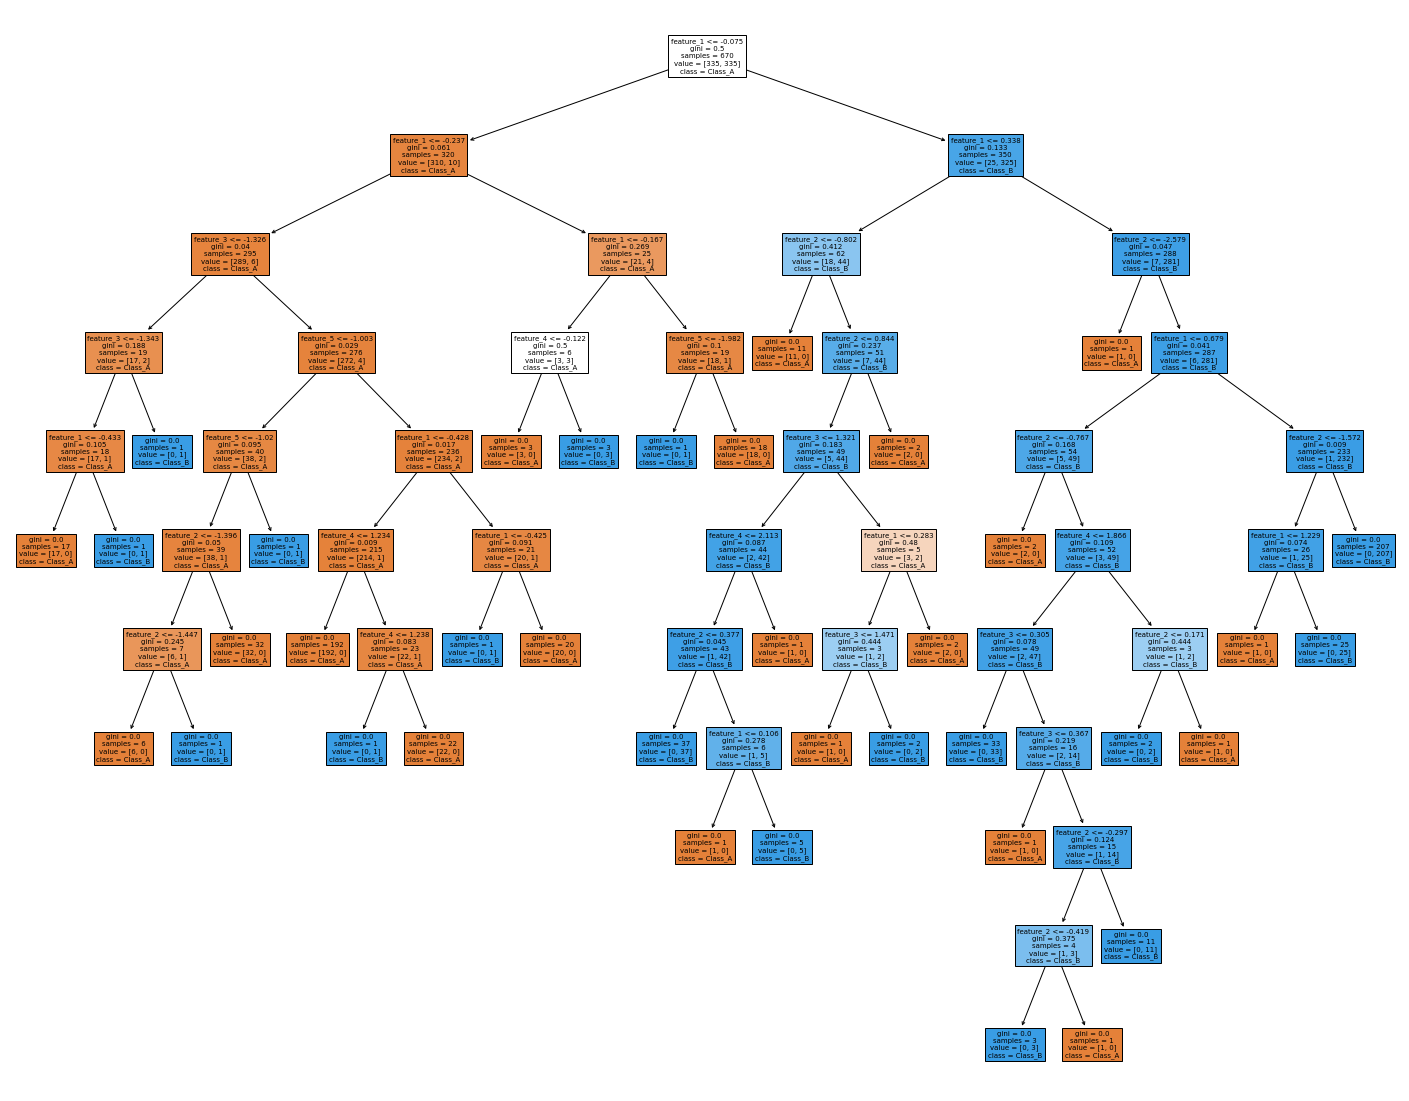

In [9]:
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(model,
                  feature_names= features_names,
                  class_names=["Class_A","Class_B"],
                  filled= True)

plt.show()

## Decision Tree Pruning

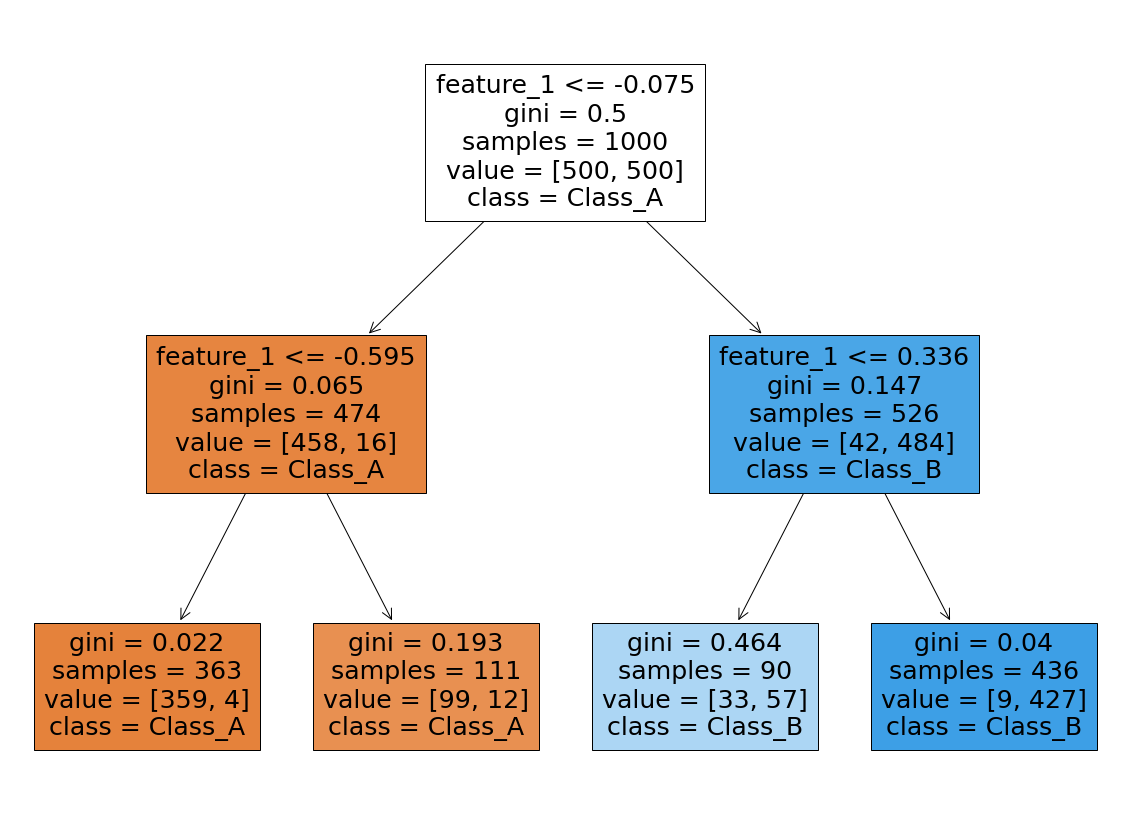

In [10]:
dc = DecisionTreeClassifier(max_depth=2)
model_max_depth = dc.fit(predictors,target)

fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(model_max_depth,
                  feature_names= features_names,
                  class_names=["Class_A", "Class_B"],
                  filled= True)

plt.show()

##  Dtreeviz 

*dtreeviz library shows how the input variables in the tree are distributed in their relationship to the output variable.*

In [11]:
viz = dtreeviz(model_max_depth,
               predictors.values, target.values.ravel(),
               target_name="target",
               feature_names=features_names,
               class_names=["Class_A", "Class_B"])

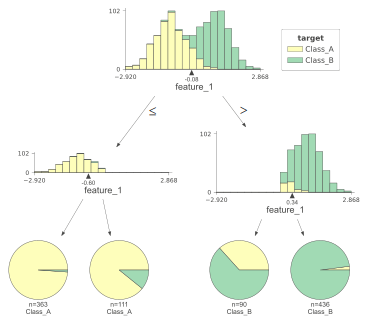

In [12]:
viz